## **Formalising draft work on hedge combination strategies**

If we can effectively retrieve realtime data to allow stop loss timing, you can create a profitable bet on volatility in either direction, provided you have (1) sufficient variation from the price of the first bet, (2) an effective implementation of stop loss, and (3) all bets being matched.

### 1. Payoff functions

To create an option-like payoff graph, we first need payoff payoff functions fixing all variables but the price at which the second bet is taken. 
These functions are defined *given* the optimal stake of the second bet and are found by substituting ls* or bs* into the win side/loss side payoff functions.

def payout_back_to_lay(bp, bs, lp, c):
    return - bs + (((bp - 1) * bs * (1 - c) + bs) * (1 - c)) / (lp - c)

def payout_lay_to_back(bp, lp, ls, c):
    return (- ls * (lp - c))/(bp * (1 - c) + c) + ls * (1 - c) 

These functions when graphed show the payoffs for each hedge strategy as the price of the second half of the bet changes:

C:\Users\Asus\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


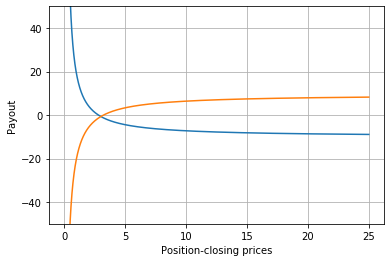

In [36]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#Set your prices, stakes and c for first bet for the example plot. Ls/bs is optimal, lp/bp is the second bet price, which is allowed to vary.
lp = np.arange(0.01, 25.0, 0.01)
payout_b_t_l = payout_back_to_lay(3, 10, lp, 0.05) 
bp = np.arange(0.01, 25.0, 0.01)
payout_l_t_b = payout_lay_to_back(bp, 3, 10, 0.05)

fig, ax = plt.subplots()
ax.plot(lp, payout_b_t_l)
ax.plot(bp, payout_l_t_b)
ax.set_ylim([-50,50])
ax.set(xlabel='Position-closing prices', ylabel='Payout')
ax.grid()

plt.show()

This graph shows that technically: 
* a back_to_lay hedge has infinite profit as lp -> 0, and limited loss -> -bs as lp -> infinity
* a lay_to_back hedge has infinite loss as bp -> 0, and limited profit -> ls (1 - c) as bp -> infinity.

In practice, all four scenarios are very unlikely as that requires you to close your hedge at an extreme price.


### 2. Combination strategies

The aim of a combination strategy is to restrict the above bets so that only the portion of the payoff above 0 remains on either side.

Suppose you combine each strategy as is. Your strategy is largely unprofitable, except for a very extreme range of low prices:

C:\Users\Asus\anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


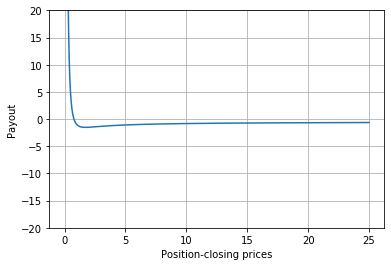

In [37]:
p = np.arange(0.00, 25.0, 0.01)
payout_combined = payout_back_to_lay(3, 10, p, 0.05) + payout_lay_to_back(p, 3, 10, 0.05)

fig, ax = plt.subplots()
ax.plot(p, payout_combined)
ax.set_ylim([-20,20])
ax.set(xlabel='Position-closing prices', ylabel='Payout')
ax.grid()

plt.show()

...